In [210]:
import image_processing as im

In [211]:
list_path = im.get_image_path_list("./data","test")
list_path

正在获取文件路径...	done.


['./data/test/image3.jpeg', './data/test/image2.jpg']

In [212]:
image_list = im.images_read(list_path)
image_list[0].shape

正在读取图片数据...	done.


/home/ouyangzhifei/project/PythonProject/tensorflow of models/examples/gender-recognition-master/image_processing.py:44: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(images_data_list)


(424, 313, 3)

In [213]:
image_list = im.images_compress(image_list,width=92,height=112)
image_list = np.array(image_list)
image_list.shape

正在进行图片缩放...	done.


(2, 112, 92, 3)

In [214]:
image_list = np.reshape(image_list[:],(-1,112*92*3)).astype("float32") / 255

In [215]:
input_labels = np.array([[0,1],[0,1]]).astype("float32")

In [216]:
input_labels.shape,image_list

((2, 2),
 array([[0.8509804 , 0.84313726, 0.8627451 , ..., 0.96862745, 0.9607843 ,
         0.98039216],
        [0.1254902 , 0.06666667, 0.03921569, ..., 0.39215687, 0.29411766,
         0.1764706 ]], dtype=float32))

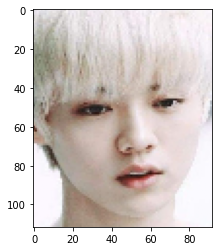

In [217]:
import numpy as np
import matplotlib.pyplot as plt

# 绘制一张图像
input_images = image_list[0]
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(np.reshape(input_images, (112, 92, 3)))
plt.show()

In [218]:
import tensorflow as tf
import os

graph_path = os.path.abspath('./model/my-gender-v1.0.meta')
model = os.path.abspath('./model/')

sess = tf.Session()
server = tf.train.import_meta_graph(graph_path)
server.restore(sess, tf.train.latest_checkpoint(model))

graph = tf.get_default_graph()

In [219]:
# 填充feed_dict
x = graph.get_tensor_by_name('images_input:0')
y = graph.get_tensor_by_name('labels_input:0')
feed_dict = {x:np.reshape(image_list[0], [1, 30912]), y: np.reshape(input_labels[0], [1, 2])}

In [220]:
# 第一层卷积+池化
relu_1 = graph.get_tensor_by_name('relu_1:0')
max_pool_1 = graph.get_tensor_by_name('max_pool_1:0')

# 第二层卷积+池化
relu_2 = graph.get_tensor_by_name('relu_2:0')
max_pool_2 = graph.get_tensor_by_name('max_pool_2:0')

# 第三层卷积+池化
relu_3 = graph.get_tensor_by_name('relu_3:0')
max_pool_3 = graph.get_tensor_by_name('max_pool_3:0')

# 全连接最后一层输出
f_softmax = graph.get_tensor_by_name('softmax_f:0')

In [221]:
# conv1 特征
r1_relu = sess.run(relu_1, feed_dict)
r1_tranpose = sess.run(tf.transpose(r1_relu, [3, 0, 1, 2]))
fig, ax = plt.subplots(nrows=1, ncols=16, figsize=(16, 1))
for i in range(16):
    ax[i].imshow(r1_tranpose[i][0])
plt.title('Conv1 16*112*92')
plt.show()

InvalidArgumentError: You must feed a value for placeholder tensor 'images_input_2' with dtype float and shape [?,30912]
	 [[node images_input_2 (defined at /home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py:1748) ]]

Original stack trace for 'images_input_2':
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 612, in start
    self.io_loop.start()
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/ioloop.py", line 743, in _run_callback
    ret = callback()
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/gen.py", line 787, in inner
    self.run()
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 381, in dispatch_queue
    yield self.process_one()
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/gen.py", line 225, in wrapper
    runner = Runner(result, future, yielded)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/gen.py", line 714, in __init__
    self.run()
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 545, in execute_request
    user_expressions, allow_stdin,
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tornado/gen.py", line 209, in wrapper
    yielded = next(result)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2867, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3072, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-4a253e2cd5b1>", line 8, in <module>
    server = tf.train.import_meta_graph(graph_path)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/training/saver.py", line 1453, in import_meta_graph
    **kwargs)[0]
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/training/saver.py", line 1477, in _import_meta_graph_with_return_elements
    **kwargs))
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/framework/meta_graph.py", line 809, in import_scoped_meta_graph_with_return_elements
    return_elements=return_elements)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/framework/importer.py", line 405, in import_graph_def
    producer_op_list=producer_op_list)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/framework/importer.py", line 517, in _import_graph_def_internal
    _ProcessNewOps(graph)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/framework/importer.py", line 243, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 3561, in _add_new_tf_operations
    for c_op in c_api_util.new_tf_operations(self)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 3561, in <listcomp>
    for c_op in c_api_util.new_tf_operations(self)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 3451, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "/home/ouyangzhifei/anaconda3/envs/tensorflowgpu/lib/python3.6/site-packages/tensorflow_core/python/framework/ops.py", line 1748, in __init__
    self._traceback = tf_stack.extract_stack()


In [ ]:
# pool1特征
max_pool_1 = sess.run(max_pool_1, feed_dict)
r1_tranpose = sess.run(tf.transpose(max_pool_1, [3, 0, 1, 2]))
fig, ax = plt.subplots(nrows=1, ncols=16, figsize=(16, 1))
for i in range(16):
    ax[i].imshow(r1_tranpose[i][0])
plt.title('Pool1 16*56*46')
plt.show()


In [ ]:
# conv2 特征
r2_relu = sess.run(relu_2, feed_dict)
r2_tranpose = sess.run(tf.transpose(r2_relu, [3, 0, 1, 2]))
fig, ax = plt.subplots(nrows=1, ncols=32, figsize=(32, 1))
for i in range(32):
    ax[i].imshow(r2_tranpose[i][0])
plt.title('Conv2 32*56*46')
plt.show()

# pool2 特征
max_pool_2 = sess.run(max_pool_2, feed_dict)
tranpose = sess.run(tf.transpose(max_pool_2, [3, 0, 1, 2]))
fig, ax = plt.subplots(nrows=1, ncols=32, figsize=(32, 1))
for i in range(32):
    ax[i].imshow(tranpose[i][0])
plt.title('Pool2 32*28*23')
plt.show()

# conv3 特征
r3_relu = sess.run(relu_3, feed_dict)
tranpose = sess.run(tf.transpose(r3_relu, [3, 0, 1, 2]))
fig, ax = plt.subplots(nrows=1, ncols=64, figsize=(32, 1))
for i in range(64):
    ax[i].imshow(tranpose[i][0])
plt.title('Conv3 64*28*23')
plt.show()

# pool3 特征
max_pool_3 = sess.run(max_pool_3, feed_dict)
tranpose = sess.run(tf.transpose(max_pool_3, [3, 0, 1, 2]))
fig, ax = plt.subplots(nrows=1, ncols=64, figsize=(32, 1))
for i in range(64):
    ax[i].imshow(tranpose[i][0])
plt.title('Pool3 64*14*12')
plt.show()

print(sess.run(f_softmax, feed_dict))